In [18]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt

Since we want to have fun while driving, we don't really care about the quality of our car afterwards. That's why, we want to **maximize** the number of **speed bumps** and **bridges**. We'll start by reading our data in. 


In [19]:

bridges = pd.read_csv("../assets/bridges.csv", sep=",", header=0)
speed_humps = pd.read_csv("../assets/speed_humps.csv", sep=",", header=0)


Printing to see what we're working with, we can see...

In [20]:
print("Bridges:")
print(bridges.head())
print("\nSpeed Bumps")
print(speed_humps.head())

Bridges:
   _id             X             Y  FID   Latitude  Longitude
0    1 -8.898096e+06  4.921740e+06    1 -79.932955  40.382894
1    2 -8.896177e+06  4.926461e+06    2 -79.915719  40.415188
2    3 -8.895425e+06  4.934084e+06    3 -79.908965  40.467302
3    4 -8.902593e+06  4.932427e+06    4 -79.973358  40.455982
4    5 -8.900032e+06  4.928115e+06    5 -79.950350  40.426503

Speed Bumps
   _id          id  hump_id  locator_address_number locator_street  pavement  \
0    1   430808404        1                  4337.0      Saline St      9257   
1   34  1520886592        2                     NaN   Summerset Dr     15346   
2   67   858537521        3                   511.0       Gold Way      1755   
3   68   297775878        4                   547.0       Gold Way      1755   
4   69  1061197751        5                   593.0       Gold Way      1755   

  speed_hump_material         neighborhood  council_district  ward  \
0             Asphalt  Squirrel Hill South             

Now, let's see which neighborhoods have the most speed bumps. We can get that as a numbered series or a nice graph. 

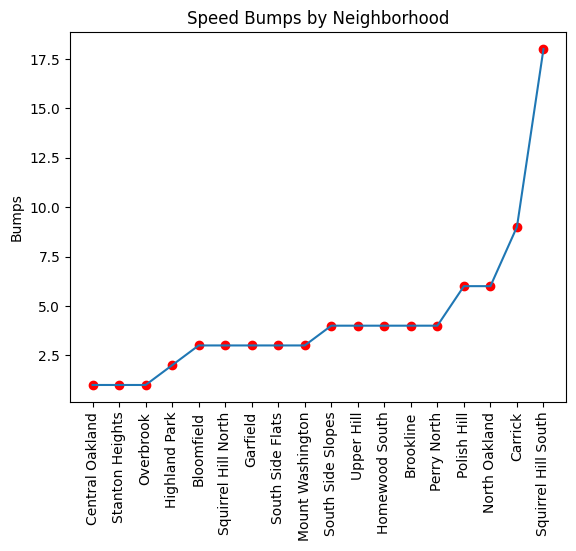

In [21]:
res = speed_humps.groupby('neighborhood')['_id'].count().sort_values(ascending=True)
# Create a bar plot
plotted = res.plot(kind='line', title="Speed Bumps by Neighborhood", xlabel="", ylabel="Bumps")
# Get the x-axis tick labels
x_labels = res.index
plotted.set_xticks(range(len(x_labels)))
plotted.set_xticklabels(x_labels, rotation=90)
# add dots to the specified values
indices = res.index[:]  # Start from the third element
values = res[indices]
plotted.scatter(indices, values, color='red', label='Highlighted Points')


Now that we know that Carrick and Squirrel Hill went *crazy* on their speed bump budget, we can convert this information into a map to visualize it even better. 

Text(25.222222222222214, 0.5, 'Latitude')

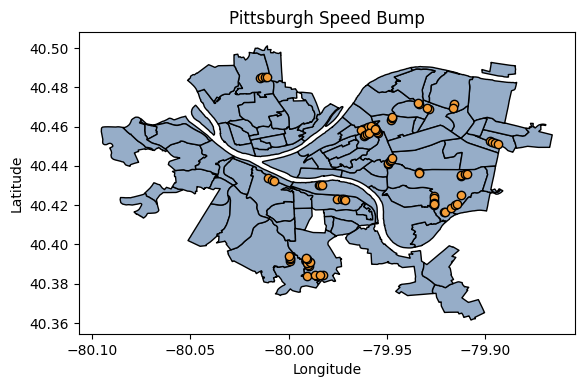

In [22]:
# read in shape files
neighborhoods = gpd.read_file('../assets/pittsburghpaneighborhoods-/Neighborhoods_.shp')

geometry = [Point(xy) for xy in zip(speed_humps['longitude'], speed_humps['latitude'])]
gdf = gpd.GeoDataFrame(speed_humps, geometry=geometry)

# plot neighborhoods
ax = neighborhoods.plot(color='#96ADC8', edgecolor='black')

# plot the bridges over top
gdf.plot(ax=ax, color='#F49D37', edgecolor='black')

plt.title('Pittsburgh Speed Bump')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

Now, let's switch gears and talk about bridges. Who doesn't love Pittsburgh bridges? We can visualize where the City of Bridges gets its name by this map. 

Neighborhoods CRS: EPSG:4326
Bridges CRS: EPSG:3857


Text(41.85576561520726, 0.5, 'Latitude')

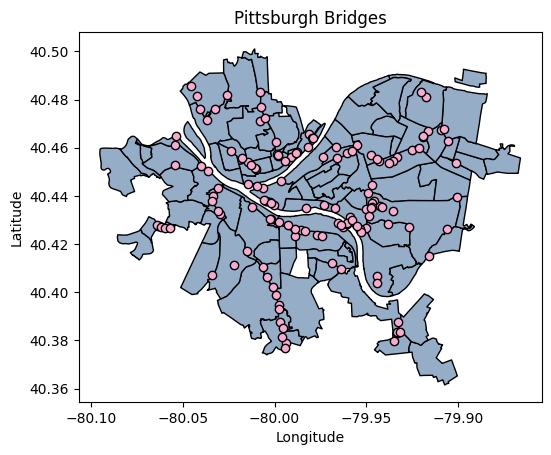

In [23]:
# read in shape files
neighborhoods = gpd.read_file('../assets/pittsburghpaneighborhoods-/Neighborhoods_.shp')
bridges_shaped = gpd.read_file('../assets/Pittsburgh_Bridges-shp/PGHBridges.shp')

# We want to make sure the scales are the same
print("Neighborhoods CRS:", neighborhoods.crs)
print("Bridges CRS:", bridges_shaped.crs)
bridges_shaped = bridges_shaped.to_crs(neighborhoods.crs)

# plot neighborhoods
ax = neighborhoods.plot(color='#96ADC8', edgecolor='black')

# plot the bridges over top
bridges_shaped.plot(ax=ax, color='#F7ACCF', edgecolor='black')

plt.title('Pittsburgh Bridges')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

Cool! So now, let's combine the maps and find what the best neighborhood is. 

<Axes: >

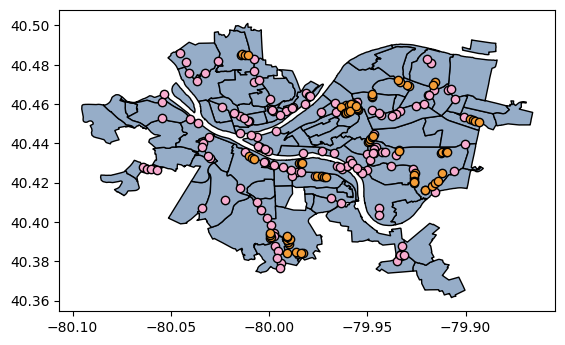

In [24]:
ax = neighborhoods.plot(color='#96ADC8', edgecolor='black')

# plot the bridges over top
bridges_shaped.plot(ax=ax, color='#F7ACCF', edgecolor='black')
gdf.plot(ax=ax, color='#F49D37', edgecolor='black')

So, we see a bunch of bridges and a bunch of speed bumps in **Squirrel Hill South**. 